In [1]:
import csv
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [62]:
language = "english"
model = ""

path = 'C:/Users/hrpeg/Documents/GitHub/policy-data-analyzer/tasks/database_analysis/output/'
file_name = f'sentence_metadata_{model.split("/")[0]}{language}.json'
file = path + file_name
with open(file, 'r') as fp:
    dictionary = json.load(fp)

In [54]:
for key in dictionary:
    print(key)

n_sentences
min_sent_length
max_sent_length
avg_sent_length
number_of_incentives
Supplies
Loan
Fine
Direct payment
Technical assistance
Tax benefit


The longest sentence has 3261 characters
The shortest sentence has 65 characters


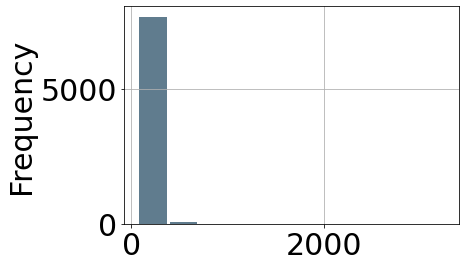

In [63]:
n_sentences = pd.Series(dictionary["avg_sent_length"])

n_sentences.plot.hist(grid=True, bins=10, rwidth=0.9,
                       color='#607c8e')
print(f"The longest sentence has {max(n_sentences)} characters")
print(f"The shortest sentence has {min(n_sentences)} characters")

(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)
(2, 0)
(2, 1)
(2, 2)
(3, 0)
(3, 1)


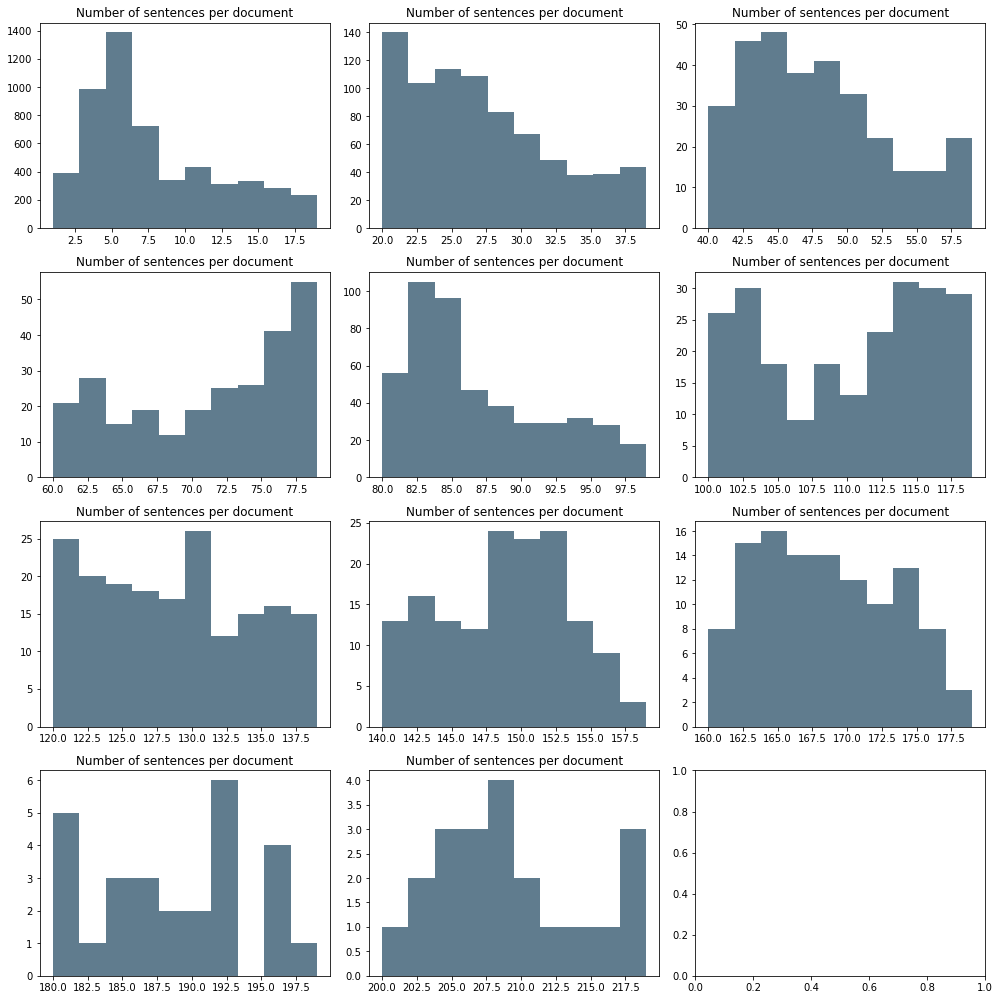

In [31]:
range_size = 20
max_value = 220

cm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(4, 3, constrained_layout = True, figsize=(35*cm, 35*cm))
counter = 0
col = -1
row = 0

for i in range(0, max_value, range_size):
#     print(i)
    col += 1
    counter += 1
#     print(f"({row}, {col})")
        
    n_sentences_ = n_sentences[(n_sentences >= i) & (n_sentences < i + 20)]
#     print(f"min: {min(n_sentences_)} -- max: {max(n_sentences_)}")


    axs[row, col].hist(n_sentences_, bins=10, color='#607c8e')#rwidth=0.9,
    axs[row, col].set_title('Number of sentences per document')
#     axs[row, col].plt.xlabel('Counts')
#     axs[row, col].plt.ylabel('Number of sentences')
#     axs[row, col].plt.grid(axis='y', alpha=0.75)
    
    if counter % 3 == 0:
        col = -1
        row += 1

In [5]:
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    labels = [int(x) for x in bins[1:] - 1]
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), labels, **kwargs)
#     plt.xlim(bins[0], bins[-1])

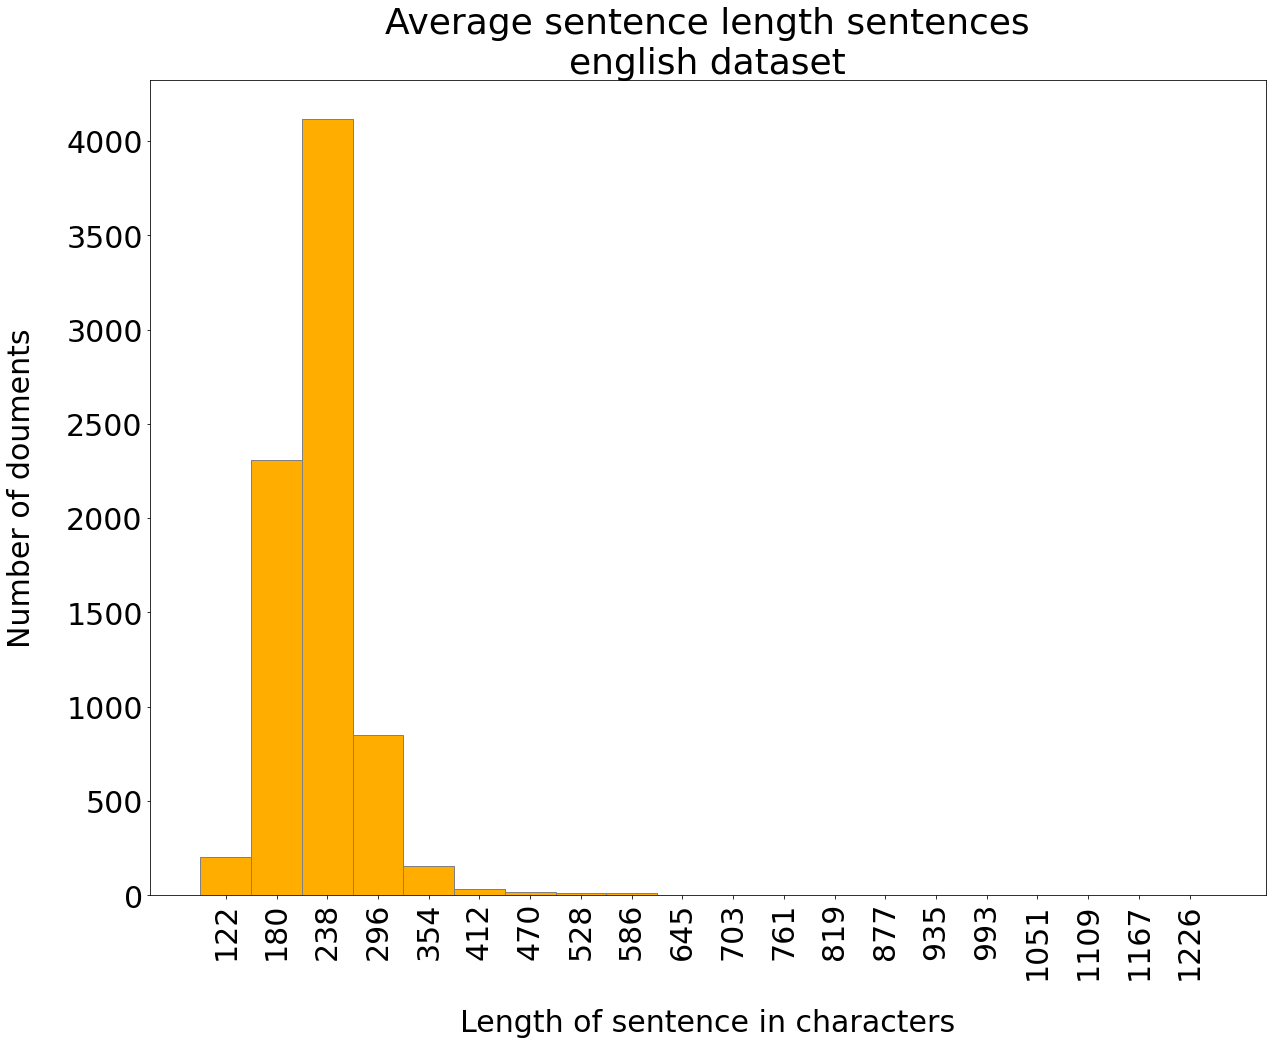

In [64]:
lower = 65
set_bins = 20
bin_size = 60
font_size = 30
x_label = "Length of sentence in characters"
y_label = "Number of douments"
upper = (bin_size * set_bins) + lower
# fig_width = (3 * set_bins * bin_size) / 20
n_sentences_ = n_sentences[(n_sentences >= lower) & (n_sentences <= upper)]

fig, ax = plt.subplots(figsize=(20, 15))
counts, bins, patches = ax.hist(n_sentences_, bins = set_bins, facecolor='#ffae00', edgecolor='gray')

# ax = n_sentences_.plot.hist(grid=True, bins=bins, rwidth=0.9, color='#ffae00')
ax.set_title(f'Average sentence length sentences\n{language} dataset')
plt.rc('font', size=font_size)  
bins_labels(bins, fontsize=font_size, rotation=90)
plt.xlabel(x_label, labelpad = 30)
plt.ylabel(y_label, labelpad = 30)
# ax.set_xticks(bins + 1)
plt.show()

